线性回归:
    ......

逻辑回归:
    分类问题当中我们期望得到一组输入对应类别的概率

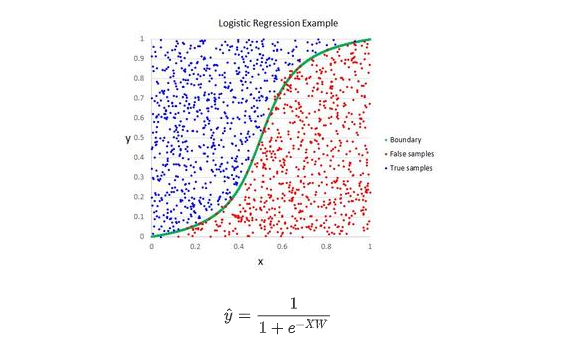

y = 预测值 |(N是样本格式)
x =  输入 |(D是特征格式)
w = 权重
二项式逻辑回归 -> 线性回归(z = XW) 输出作为Sigmoid函数 输入
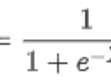

执行多分类 多项逻辑回归(softmax 分类器) 线性方程(Z=XW) 归一化, 输出y分类的概率
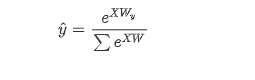

目标:输入X 预测属于他的类别Y的概率 softmax分类器会对线性输出 归一化处理 分类概率
优点:给出和输入对应的分了概率
缺点: 离群群 SVM(支持向量机)
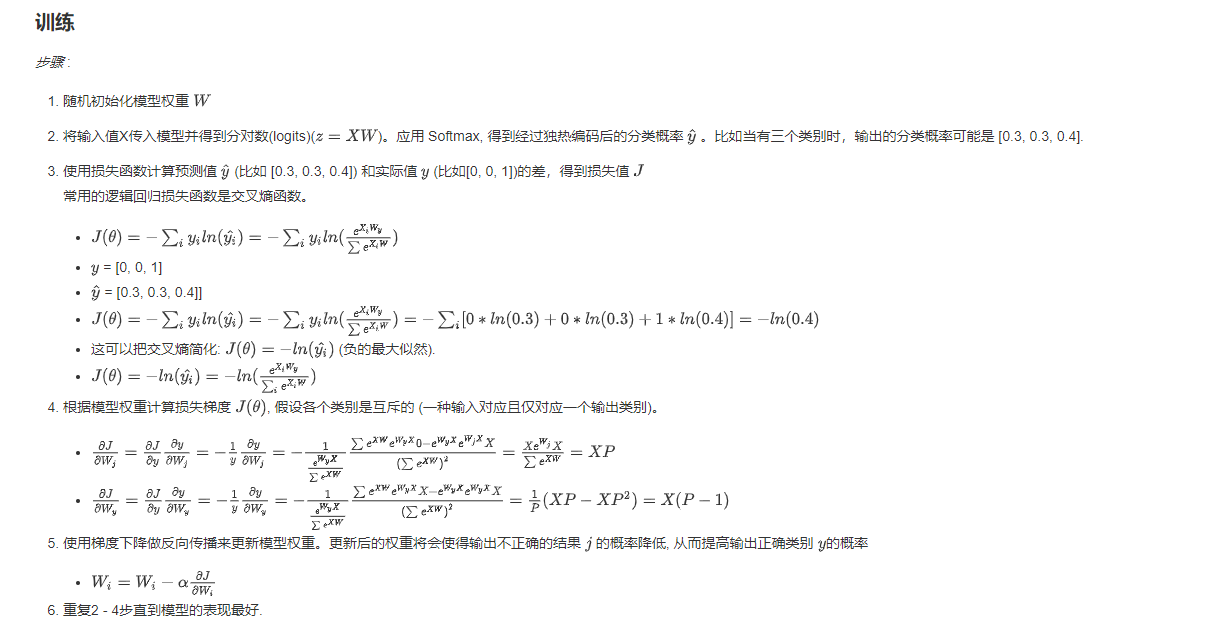

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import random

In [2]:
def true_classifier(i):
    # 定义训练数据集的分类标签
    if i >= 700:
        return 1
    return 0

In [3]:
x = np.array([random.randint(0, 1000) for i in range(0, 1000)])

In [4]:
x


array([243, 829, 211, 202, 208,  99, 432, 290, 866,  84, 735, 970, 553,
        36, 970, 476, 737, 322, 275,  53, 170, 581, 829, 225, 981,   9,
       582,  80, 582, 758, 385, 642, 443, 348, 116, 278, 743, 724, 110,
       839, 762, 701, 398, 189, 287, 526, 876, 195, 750, 551, 864, 375,
       842, 710, 693, 857, 294, 226, 951, 584,  97, 688,  10, 749,   3,
       631, 190, 576, 968, 176, 632, 627, 138, 883, 426, 220, 998, 869,
       205, 866, 909, 835, 240,  14, 502, 861, 685, 846, 915, 311, 705,
       589, 387, 581, 786, 726, 439, 652, 810, 544, 158, 433, 281,  97,
       743, 509, 468, 675, 912, 753, 852, 227, 306, 445, 597, 639, 444,
       623, 386, 543,  47, 614, 822, 923, 241, 696, 220,  33, 277, 441,
       190,   4, 421, 990, 791, 464, 878, 143, 626, 243,  49, 694, 103,
        19, 674, 553, 366, 200, 428, 711, 410, 287, 854, 408, 624, 956,
       477, 413, 306, 855, 929, 973, 724, 265, 444, 170, 930, 264, 522,
       708, 499, 411, 499, 378, 725, 516, 109, 484, 151,  93, 72

In [5]:
# 逻辑回归 二维数组
x = x.reshape((-1, 1))

In [6]:
x

array([[243],
       [829],
       [211],
       [202],
       [208],
       [ 99],
       [432],
       [290],
       [866],
       [ 84],
       [735],
       [970],
       [553],
       [ 36],
       [970],
       [476],
       [737],
       [322],
       [275],
       [ 53],
       [170],
       [581],
       [829],
       [225],
       [981],
       [  9],
       [582],
       [ 80],
       [582],
       [758],
       [385],
       [642],
       [443],
       [348],
       [116],
       [278],
       [743],
       [724],
       [110],
       [839],
       [762],
       [701],
       [398],
       [189],
       [287],
       [526],
       [876],
       [195],
       [750],
       [551],
       [864],
       [375],
       [842],
       [710],
       [693],
       [857],
       [294],
       [226],
       [951],
       [584],
       [ 97],
       [688],
       [ 10],
       [749],
       [  3],
       [631],
       [190],
       [576],
       [968],
       [176],
       [632],
      

In [8]:
# 0失败, 1成功
y = [true_classifier(x[i][0]) for i in range(0, 1000)]

In [9]:
y

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,


In [10]:
y = np.array(y)

In [11]:
model = LogisticRegression()

In [12]:
model = model.fit(x, y)

In [18]:
samples = [random.randint(0, 1000) for i in range(0, 100)]
samples = np.array(samples)
samples = samples.reshape(-1, 1)

In [19]:
_class = model.predict(samples)

In [20]:
_class

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [23]:
# 标签概率
proba = model.predict_proba(samples)

In [24]:
num_accurate = 0
for i in range(0, 100):
    if (true_classifier(samples[i])) == (_class[i] == 1):
        num_accurate += 1
    print('' + str(samples[i]) + "所属分类"+ str(_class[i]) + ", 概率" + str(proba[i]))

[226]所属分类0, 概率[1.00000000e+000 6.00429952e-219]
[161]所属分类0, 概率[1.00000000e+000 5.38962177e-249]
[511]所属分类0, 概率[1.00000000e+00 3.33104231e-87]
[556]所属分类0, 概率[1.00000000e+00 2.11000245e-66]
[876]所属分类1, 概率[0. 1.]
[520]所属分类0, 概率[1.00000000e+00 4.81859817e-83]
[38]所属分类0, 概率[1.00000000e+000 7.47430139e-306]
[247]所属分类0, 概率[1.00000000e+000 3.06142525e-209]
[255]所属分类0, 概率[1.00000000e+000 1.52758069e-205]
[394]所属分类0, 概率[1.00000000e+000 2.74253918e-141]
[426]所属分类0, 概率[1.00000000e+000 1.70010146e-126]
[424]所属分类0, 概率[1.00000000e+000 2.02280824e-127]
[325]所属分类0, 概率[1.00000000e+000 3.48504614e-173]
[46]所属分类0, 概率[1.00000000e+000 3.72950424e-302]
[962]所属分类1, 概率[0. 1.]
[424]所属分类0, 概率[1.00000000e+000 2.02280824e-127]
[876]所属分类1, 概率[0. 1.]
[505]所属分类0, 概率[1.00000000e+00 5.61073522e-90]
[426]所属分类0, 概率[1.00000000e+000 1.70010146e-126]
[361]所属分类0, 概率[1.00000000e+000 1.52605709e-156]
[292]所属分类0, 概率[1.00000000e+000 1.93921727e-188]
[115]所属分类0, 概率[1.00000000e+000 2.93491424e-270]
[574]所属分类0, 概率[1.00000000e+00 4.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
data = pd.read_csv('./ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])

In [27]:
data

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [28]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

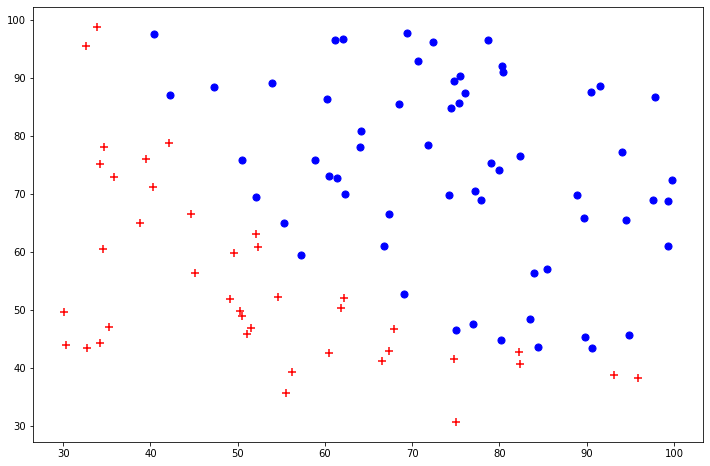

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='+', label='Not Admitted')

h = g(theta**t X)
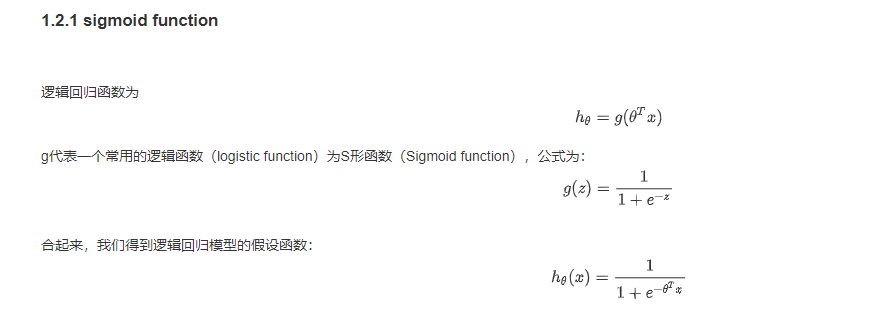

In [30]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [87]:
def sigmoid2(z):
    h = np.zeros((len(z), 1))
    h = 1.0 / (1.0 + np.exp(-z))
    return h

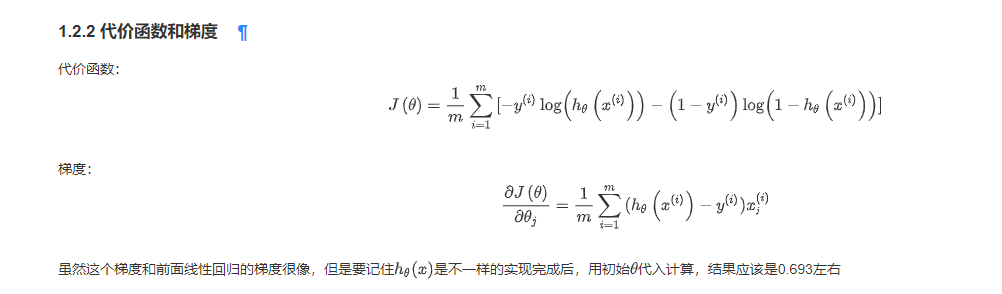

In [32]:
def costFunction(theta, X, y, inital_lambda):
    m = len(y)
    J = 0
    h = sigmoid2(np.dot(X, theta)) # 计算 h(z)
    theta1 = theta.copy()
    
    theta1[0] = 0
    temp = np.dot(np.transpose(theta1), theta1)
    J = (-np.dot(np.transpose(y), np.log(h)) - np.dot(np.transpose(1 - y), np.log(1 - h))) + temp
    return J

In [34]:
def costFunction2(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / len(X)

In [35]:
data.insert(0, 'ones', 1)

In [36]:
data

,ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
...,...,...,...,...
95,1,83.489163,48.380286,1
96,1,42.261701,87.103851,1
97,1,99.315009,68.775409,1
98,1,55.340018,64.931938,1


In [37]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]
theta = np.zeros(3)

In [38]:
X

,ones,Exam1,Exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376
...,...,...,...
95,1,83.489163,48.380286
96,1,42.261701,87.103851
97,1,99.315009,68.775409
98,1,55.340018,64.931938


In [39]:
y

,Admitted
0,0
1,0
2,0
3,1
4,1
...,...
95,1
96,1
97,1
98,1


In [40]:
theta

array([0., 0., 0.])

In [41]:
X = np.array(X.values)
y = np.array(y.values)

In [43]:
costFunction2(theta, X, y)

0.6931471805599453

In [ ]:
def gradient1(theta, X, y, inital_lambda):
    m = len(y)
    grad = np.zeros(theta.shape[0])
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0
    grad = np.dot(np.transpose(X), h-y) / m * theta1
    return grad

In [46]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [47]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunction2, x0=theta, fprime=gradient, args=(X, y))

In [48]:
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [49]:
costFunction2(result[0], X, y)

0.20349770158947425

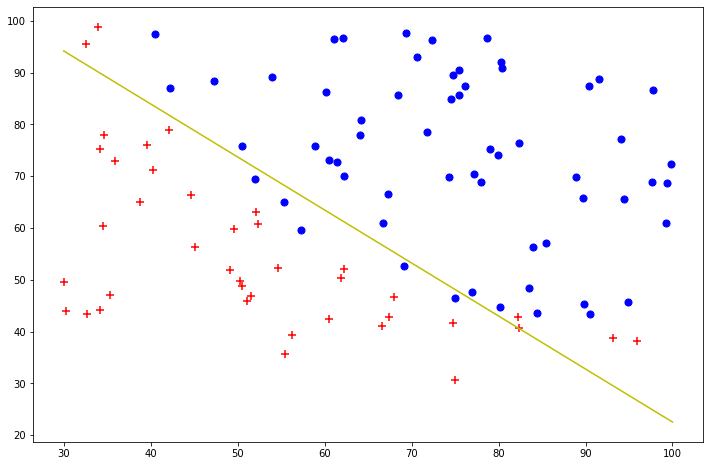

In [51]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = (-result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Perdiction')
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='+', label='Not Admitted')

In [61]:
def hfun1(theta, X):
    return sigmoid(np.dot(theta.T, X))
hfun1(result[0], [1, 60, 60])

0.332004226639305

In [66]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
#     return probability
    return [1 if x >= 0.5 else 0 for x in probability]

In [68]:
predict(np.matrix(result[0]), [1, 60, 60])

[0]

In [70]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]

In [72]:
accuracy = (sum(map(int, correct)) % len(correct))

In [73]:
accuracy # 画出对应曲线

89

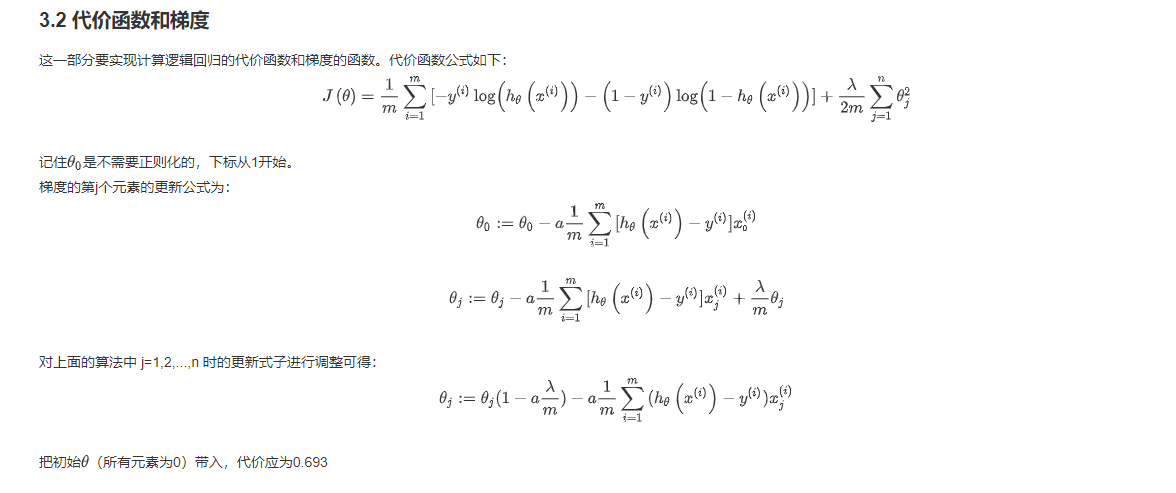

In [88]:
def costReg(theta, X, y, inital_lambda):
    m = len(y)
    J = 0
    h = sigmoid2(np.dot(X, theta)) # 计算 h(z)
    theta1 = theta.copy()
    
    theta1[0] = 0
    temp = np.dot(np.transpose(theta1), theta1)
    J = (-np.dot(np.transpose(y), np.log(h)) - np.dot(np.transpose(1 - y), np.log(1 - h)) + temp * inital_lambda / 2) / m
    return J

In [89]:
def costReg2(theta, X, y, inital_lambda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    # 正则化
    reg = (inital_lambda / ( 2 * len(X))) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [102]:
# def gradientReg1(theta, X, y, inital_lambda):
#     m = len(y)
#     grad = np.zeros((theta.shape[0]))
    
#     h = sigmoid(np.dot(X, theta))
#     theta1 = theta.copy()
    
#     theta1[0] = 0
    
#     grad = np.dot(np.transpose(X), h-y) / m + inital_lambda / m * theta1 # 正则化
#     return grad

In [97]:
def gradientReg2(theta, X, y, inital_lambda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((inital_lambda / len(X))) * theta[:, i]
    return grad

In [79]:
data2 = pd.read_csv('./ex2data2.txt', header=None, names=['Test1', 'Test2', 'Accepted'])

In [80]:
data2

,Test1,Test2,Accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [81]:
degree = 6
data3 = data2
x1 = data3['Test1']
x2 = data3['Test2']
data3.insert(3, 'ones', 1)

for i in range(1, degree+1):
    for j in range(0, i + 1):
        data3['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

In [83]:
data3.drop('Test1', axis=1, inplace=True)
data3.drop('Test2', axis=1, inplace=True)

In [84]:
data3

,Accepted,ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.699560,0.002628,0.035864,0.489384,1.347453e-04,0.001839,0.025089,...,0.000900,1.227829e-02,1.675424e-01,1.815630e-08,2.477505e-07,3.380660e-06,4.613055e-05,6.294709e-04,8.589398e-03,1.172060e-01
1,1,1,-0.092742,0.684940,0.008601,-0.063523,0.469143,-7.976812e-04,0.005891,-0.043509,...,0.002764,-2.041205e-02,1.507518e-01,6.362953e-07,-4.699318e-06,3.470651e-05,-2.563226e-04,1.893054e-03,-1.398103e-02,1.032560e-01
2,1,1,-0.213710,0.692250,0.045672,-0.147941,0.479210,-9.760555e-03,0.031616,-0.102412,...,0.015151,-4.907685e-02,1.589699e-01,9.526844e-05,-3.085938e-04,9.995978e-04,-3.237900e-03,1.048821e-02,-3.397345e-02,1.100469e-01
3,1,1,-0.375000,0.502190,0.140625,-0.188321,0.252195,-5.273438e-02,0.070620,-0.094573,...,0.017810,-2.385083e-02,3.194040e-02,2.780914e-03,-3.724126e-03,4.987251e-03,-6.678793e-03,8.944062e-03,-1.197765e-02,1.604015e-02
4,1,1,-0.513250,0.465640,0.263426,-0.238990,0.216821,-1.352032e-01,0.122661,-0.111283,...,0.026596,-2.412849e-02,2.189028e-02,1.827990e-02,-1.658422e-02,1.504584e-02,-1.365016e-02,1.238395e-02,-1.123519e-02,1.019299e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,1,-0.720620,0.538740,0.519293,-0.388227,0.290241,-3.742131e-01,0.279764,-0.209153,...,0.081199,-6.070482e-02,4.538330e-02,1.400354e-01,-1.046913e-01,7.826790e-02,-5.851357e-02,4.374511e-02,-3.270412e-02,2.444980e-02
114,0,1,-0.593890,0.494880,0.352705,-0.293904,0.244906,-2.094682e-01,0.174547,-0.145447,...,0.042748,-3.562096e-02,2.968243e-02,4.387691e-02,-3.656200e-02,3.046659e-02,-2.538737e-02,2.115493e-02,-1.762810e-02,1.468924e-02
115,0,1,-0.484450,0.999270,0.234692,-0.484096,0.998541,-1.136964e-01,0.234520,-0.483743,...,0.234178,-4.830370e-01,9.963553e-01,1.292688e-02,-2.666414e-02,5.499985e-02,-1.134476e-01,2.340073e-01,-4.826843e-01,9.956280e-01
116,0,1,-0.006336,0.999270,0.000040,-0.006332,0.998541,-2.544062e-07,0.000040,-0.006327,...,0.000040,-6.317918e-03,9.963553e-01,6.472253e-14,-1.020695e-11,1.609667e-09,-2.538495e-07,4.003286e-05,-6.313306e-03,9.956280e-01


In [85]:
cols = data3.shape[1]
x2 = data3.iloc[:, 1:cols]
y2 = data3.iloc[:, 0:1]
theta2 = np.zeros(cols - 1)

X2 = np.array(x2)
y2 = np.array(y2)

inital_lambda = 1

In [94]:
costReg(theta2, X2, y2, inital_lambda)

array([0.69314718])

In [95]:
costReg2(theta2, X2, y2, inital_lambda)

0.6931471805599454

In [104]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg2, args=(X2, y2, inital_lambda))

In [105]:
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603299, -0.04466178, -0.2777895 , -0.29539514,
        -0.45645981, -1.04319154,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]),
 32,
 1)

In [106]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]

In [107]:
accuracy = (sum(map(int, correct)) % len(correct))

In [108]:
accuracy

98

In [ ]:
# 决策曲线